In [83]:
import numpy as np
import os
import itertools
import glob
import random
import shutil
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [75]:
os.chdir("C:/Users/mohit/Image Processing/cat-dog datatset")

if os.path.isdir("train/dog") is False:
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")
    
    for c in random.sample(glob.glob("cat*"), 200):
        shutil.move(c, "train/cat")
    for c in random.sample(glob.glob("dog*"), 200):
        shutil.move(c, "train/dog")
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, "valid/cat")
    for c in random.sample(glob.glob("dog*"), 100):
        shutil.move(c, "valid/dog")
    for c in random.sample(glob.glob("cat*"), 50):
        shutil.move(c, "test/cat")
    for c in random.sample(glob.glob("dog*"), 50):
        shutil.move(c, "test/dog")

os.chdir("../../")

In [84]:
train_path = "C:/Users/mohit/Image Processing/cat-dog datatset/train"
test_path = "C:/Users/mohit/Image Processing/cat-dog datatset/test"
valid_path = "C:/Users/mohit/Image Processing/cat-dog datatset/valid"

In [85]:
#Preprocessing for model

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# CNN Model

In [86]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [87]:
model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation='softmax')
])

In [88]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)      

In [89]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [90]:
hist1 = model1.fit(train_batches, validation_data=valid_batches, shuffle=True, batch_size=10 , epochs=20)

Epoch 1/20
40/40 [==============================] - 6s 142ms/step - loss: 14.5230 - accuracy: 0.5525 - val_loss: 1.5333 - val_accuracy: 0.6000
Epoch 2/20
40/40 [==============================] - 6s 148ms/step - loss: 1.7612 - accuracy: 0.5425 - val_loss: 2.3036 - val_accuracy: 0.5000
Epoch 3/20
40/40 [==============================] - 5s 137ms/step - loss: 1.2886 - accuracy: 0.6000 - val_loss: 1.1439 - val_accuracy: 0.5600
Epoch 4/20
40/40 [==============================] - 4s 91ms/step - loss: 0.8397 - accuracy: 0.6225 - val_loss: 1.3481 - val_accuracy: 0.5600
Epoch 5/20
40/40 [==============================] - 5s 129ms/step - loss: 0.9683 - accuracy: 0.6125 - val_loss: 1.2009 - val_accuracy: 0.6000
Epoch 6/20
40/40 [==============================] - 3s 87ms/step - loss: 0.9318 - accuracy: 0.5900 - val_loss: 0.8961 - val_accuracy: 0.6100
Epoch 7/20
40/40 [==============================] - 5s 131ms/step - loss: 0.6908 - accuracy: 0.6750 - val_loss: 0.9491 - val_accuracy: 0.5750
Epoch 8

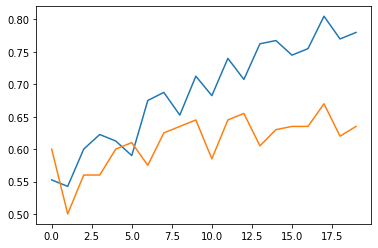

In [91]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

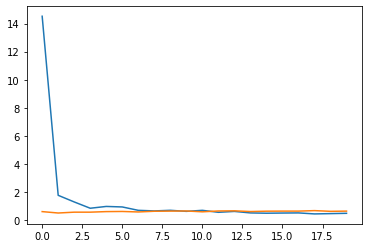

In [92]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

In [93]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [94]:
pred = model1.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 1, 0, 0, 0, 0, 1, 0, 1, 1]

In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30 20]
 [16 34]]


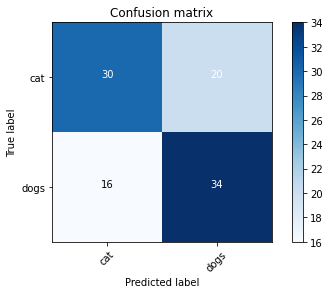

In [96]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=["cat","dogs"])

# VGG16 Model

In [ ]:
#vgg16_model = tf.keras.applications.vgg16.VGG16()

In [97]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [98]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)

In [99]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [100]:
for layer in model.layers:
    layer.trainable = False

In [101]:
model2.add(Dense(units=2, activation="softmax"))

In [102]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [103]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [104]:
hist2 = model2.fit(x=train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=30)

Epoch 1/30
40/40 [==============================] - 21s 511ms/step - loss: 0.7522 - accuracy: 0.6775 - val_loss: 0.3403 - val_accuracy: 0.8500
Epoch 2/30
40/40 [==============================] - 25s 649ms/step - loss: 0.1633 - accuracy: 0.9350 - val_loss: 0.2097 - val_accuracy: 0.9200
Epoch 3/30
40/40 [==============================] - 21s 526ms/step - loss: 0.0889 - accuracy: 0.9625 - val_loss: 0.1732 - val_accuracy: 0.9300
Epoch 4/30
40/40 [==============================] - 20s 517ms/step - loss: 0.0600 - accuracy: 0.9825 - val_loss: 0.1522 - val_accuracy: 0.9450
Epoch 5/30
40/40 [==============================] - 23s 575ms/step - loss: 0.0421 - accuracy: 0.9925 - val_loss: 0.1427 - val_accuracy: 0.9550
Epoch 6/30
40/40 [==============================] - 21s 522ms/step - loss: 0.0323 - accuracy: 0.9950 - val_loss: 0.1338 - val_accuracy: 0.9600
Epoch 7/30
40/40 [==============================] - 21s 526ms/step - loss: 0.0252 - accuracy: 0.9975 - val_loss: 0.1294 - val_accuracy: 0.9650

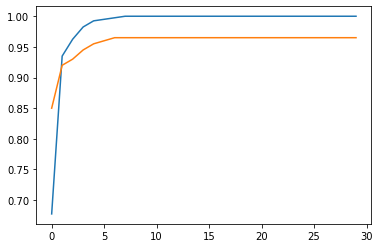

In [105]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

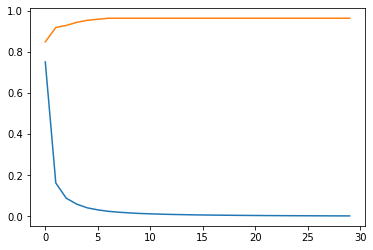

In [106]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [107]:
pred = model2.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 1 49]]


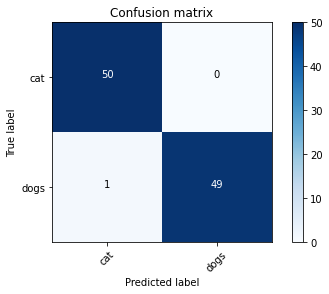

In [110]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=["cat","dogs"])